<a href="https://colab.research.google.com/github/atikahlestar/Data-Science/blob/main/Project_2_Predicting_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2
Memprediksi Probabilitas Penyakit Gagal Jantung Berdasarkan Data Uji Klinis

### Heart Disease Dataset
    Dataset tentang informasi tes klinis pasien dan diagnosis penyakit gagal jantung.

### Sumber Data
https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

### Masalah Bisnis
    Bagaimana cara meningkatkan tingkat kelangsungan hidup penyakit gagal jantung dengan membuat deteksi dini atau prediksi berdasarkan data uji klinis?

### Tujuan
    Membangun model klasifikasi untuk memprediksi probabilitas penyakit gagal jantung.

### Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/heart_statlog.csv'

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(file_path)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
## Check Missing Values

In [7]:
df.isna().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [8]:
## Check Outliers

In [9]:
for col in df.columns:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5 *iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for age
(0, 12)
Running for sex
(281, 12)
Running for chest pain type
(66, 12)
Running for resting bp s
(37, 12)
Running for cholesterol
(193, 12)
Running for fasting blood sugar
(254, 12)
Running for resting ecg
(0, 12)
Running for max heart rate
(1, 12)
Running for exercise angina
(0, 12)
Running for oldpeak
(11, 12)
Running for ST slope
(0, 12)
Running for target
(0, 12)


In [10]:
for col in df.columns:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5 *iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

Running for age
Running for sex
Running for chest pain type
Running for resting bp s
Running for cholesterol
Running for fasting blood sugar
Running for resting ecg
Running for max heart rate
Running for exercise angina
Running for oldpeak
Running for ST slope
Running for target


In [11]:
df.shape

(562, 12)

In [12]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1179,44,1,4,120,169,0,0,144,1,2.8,3,1
1180,63,1,4,140,187,0,2,144,1,4.0,1,1
1182,41,1,2,120,157,0,0,182,0,0.0,1,0
1187,57,1,4,130,131,0,0,115,1,1.2,2,1


In [13]:
## Check Duplicates

In [14]:
df.duplicated().sum()

141

### EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  562 non-null    int64  
 1   sex                  562 non-null    int64  
 2   chest pain type      562 non-null    int64  
 3   resting bp s         562 non-null    int64  
 4   cholesterol          562 non-null    int64  
 5   fasting blood sugar  562 non-null    int64  
 6   resting ecg          562 non-null    int64  
 7   max heart rate       562 non-null    int64  
 8   exercise angina      562 non-null    int64  
 9   oldpeak              562 non-null    float64
 10  ST slope             562 non-null    int64  
 11  target               562 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 57.1 KB


In [16]:
## Univariate Analysis

In [17]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,562.000000,562.0,562.000000,562.000000,562.000000,562.0,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,52.373665,1.0,3.366548,130.190391,239.256228,0.0,0.676157,140.514235,0.425267,0.981851,1.580071,0.544484
std,9.448569,0.0,0.801615,14.959638,48.276741,0.0,0.886682,24.924856,0.494824,1.098496,0.592431,0.498461
min,28.000000,1.0,2.000000,92.000000,85.000000,0.0,0.000000,71.000000,0.000000,-0.100000,1.000000,0.000000
25%,45.000000,1.0,3.000000,120.000000,207.250000,0.0,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.0,4.000000,130.000000,235.000000,0.0,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,59.000000,1.0,4.000000,140.000000,271.750000,0.0,2.000000,160.000000,1.000000,1.800000,2.000000,1.000000
max,77.000000,1.0,4.000000,170.000000,388.000000,0.0,2.000000,202.000000,1.000000,4.400000,3.000000,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

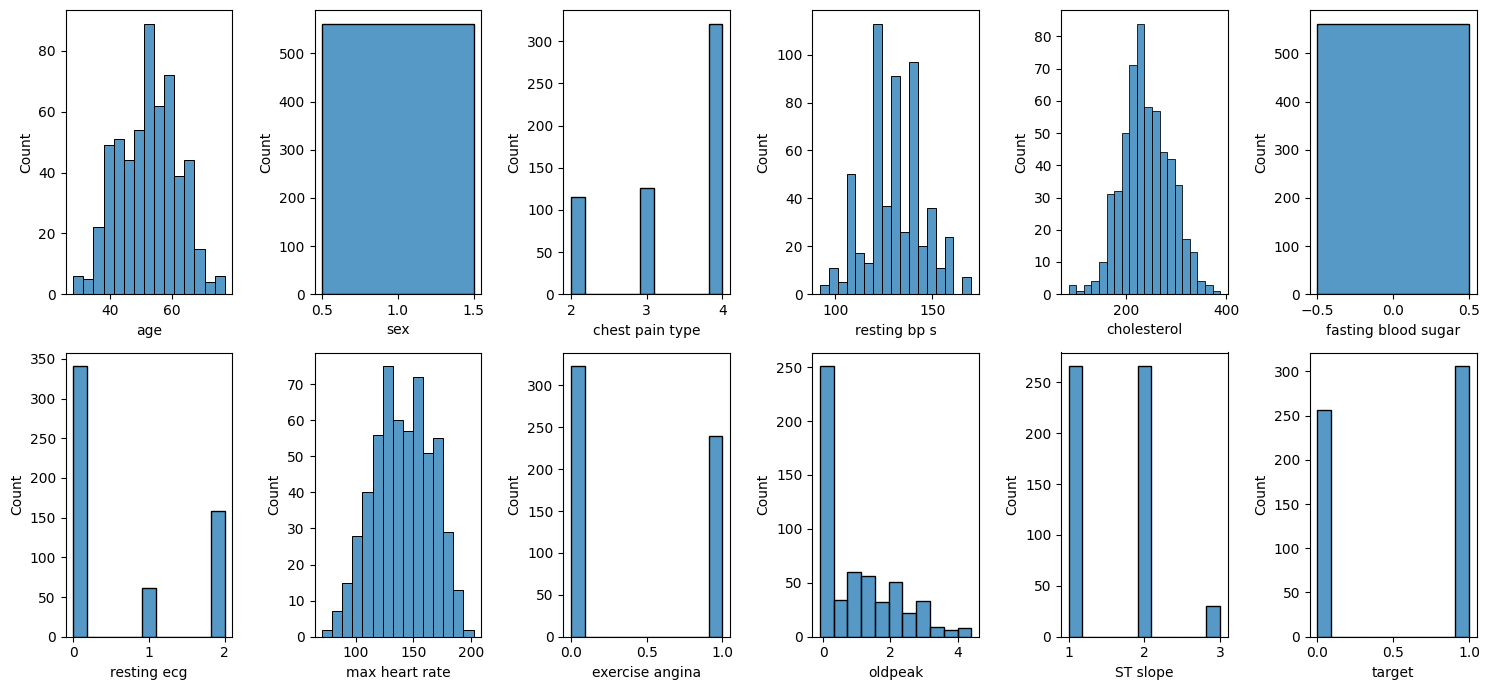

In [19]:
plt.figure(figsize = (15, 7))
for i in range(len(df.columns)):
    plt.subplot(2,6, i+1)
    sns.histplot(x = df.columns[i], data = df)
    plt.tight_layout()

In [20]:
## Multivariate Analysis

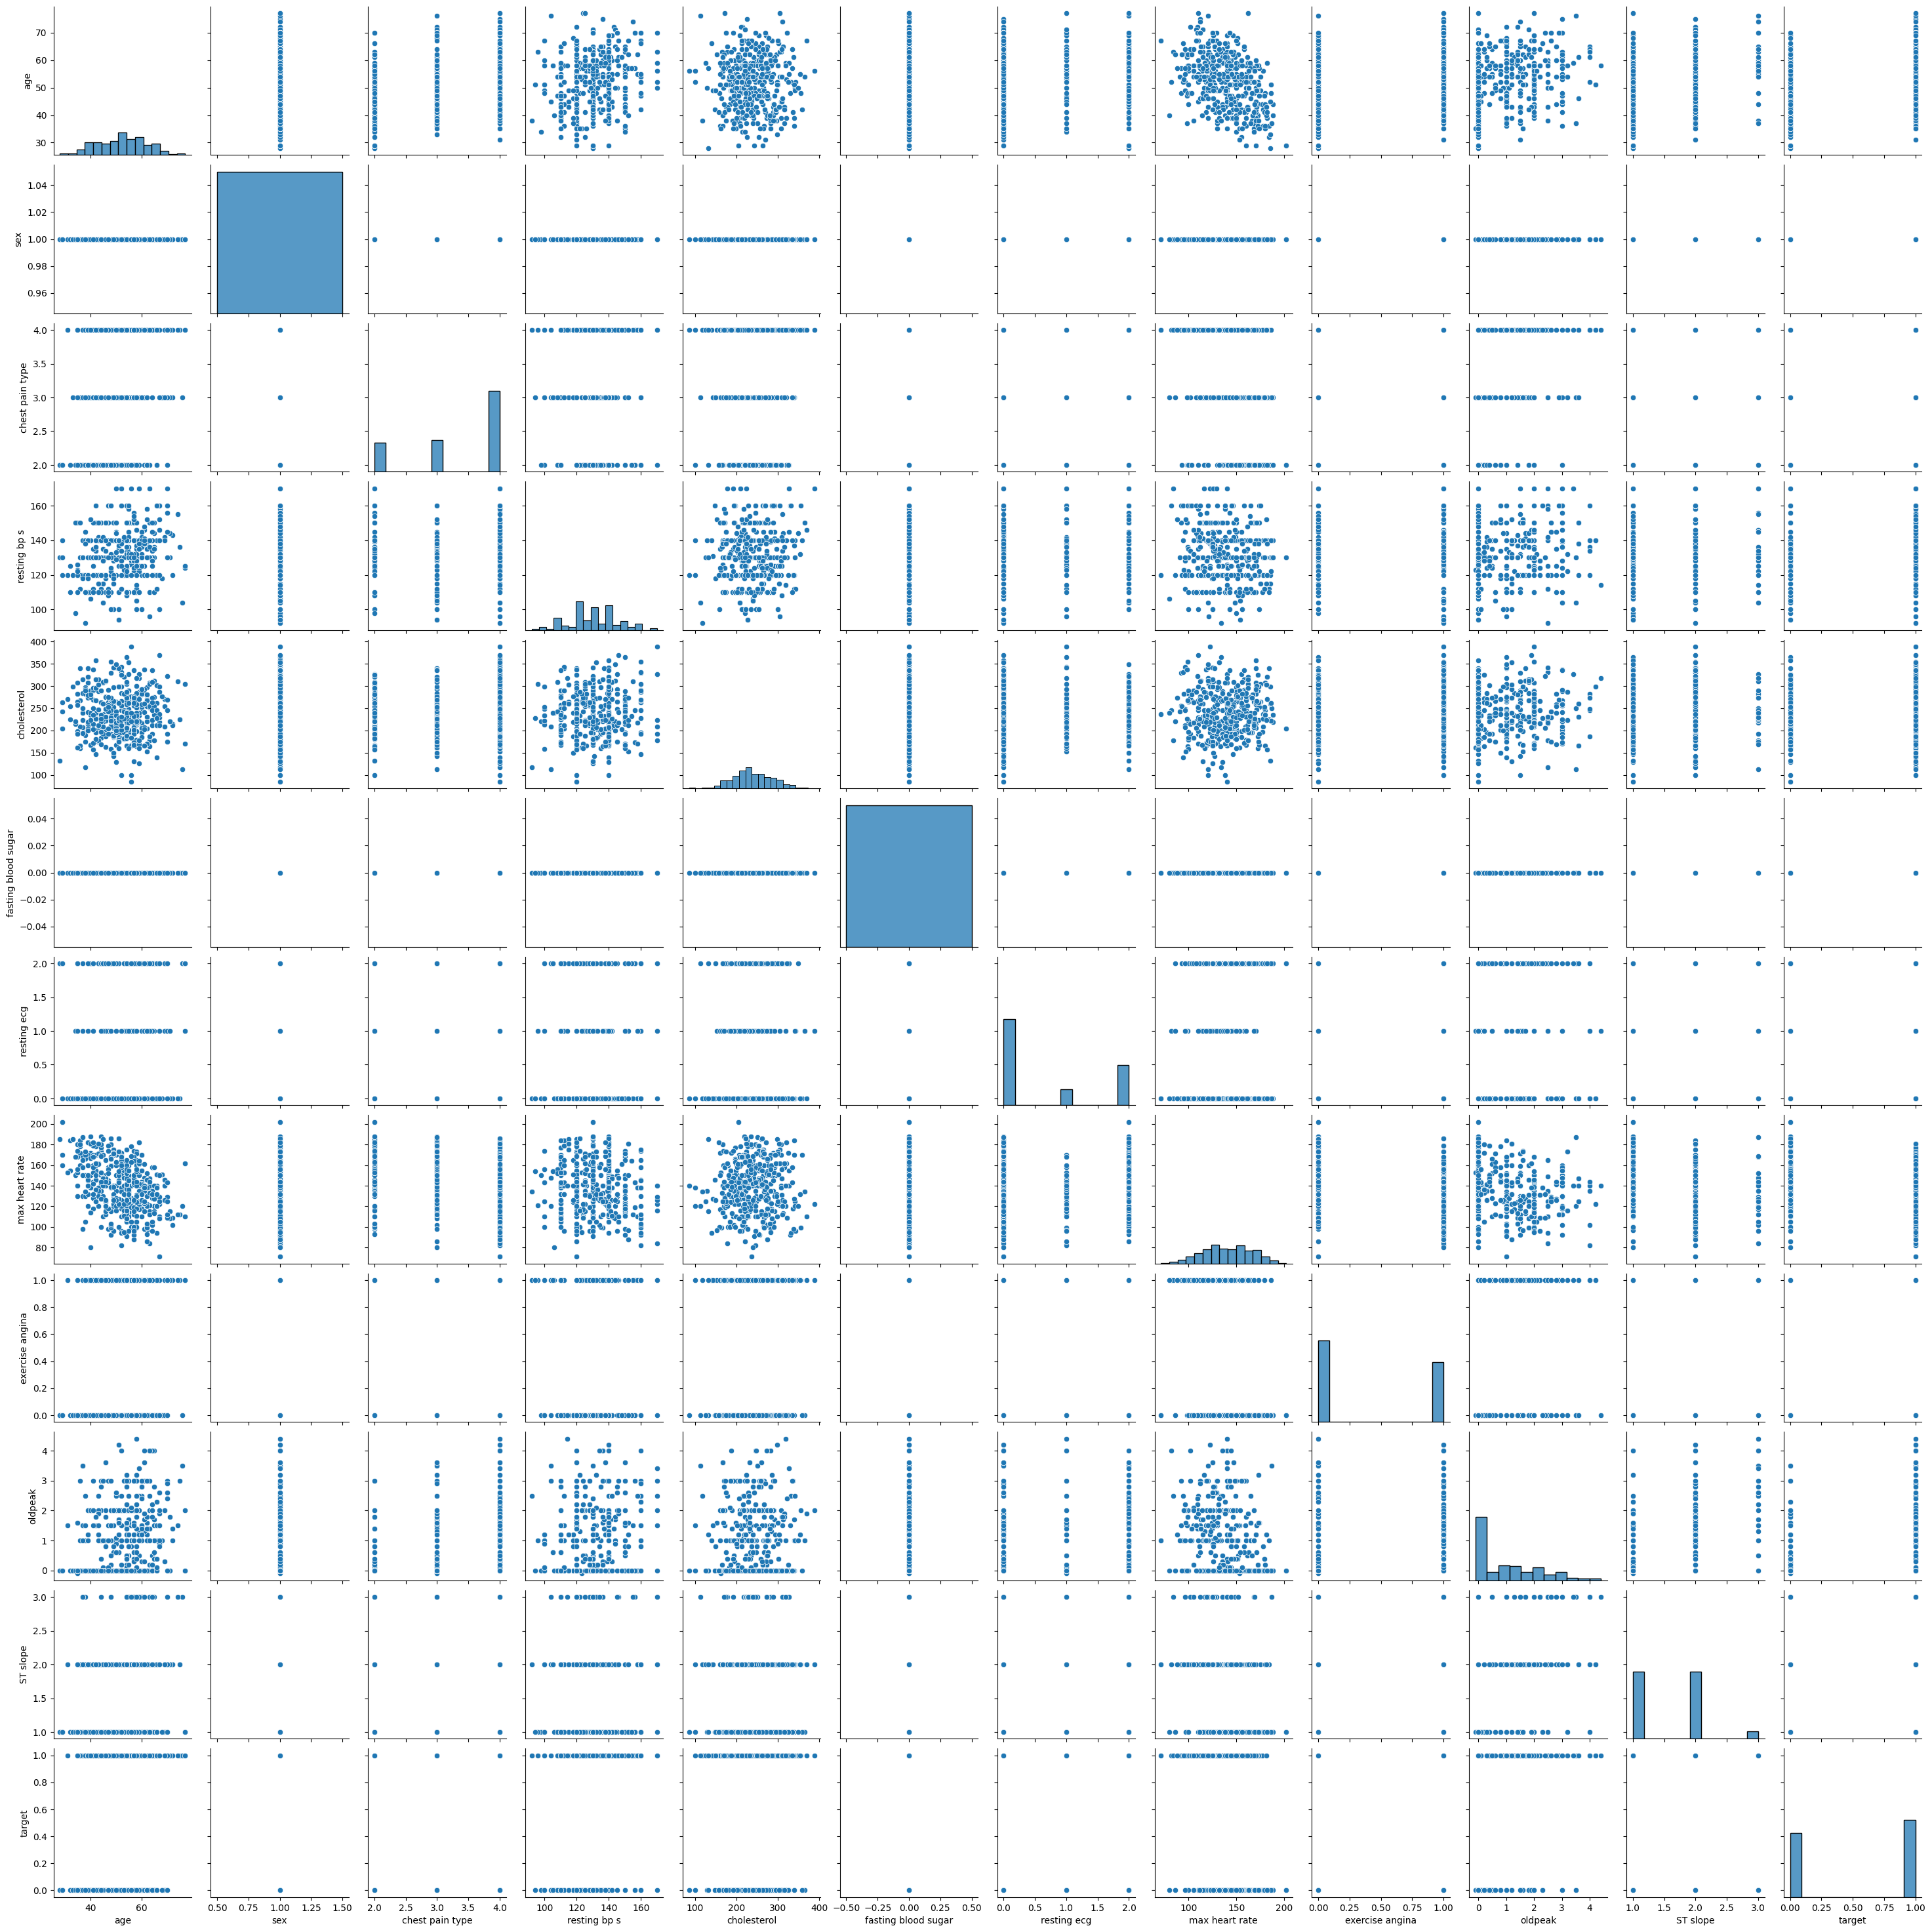

In [21]:
sns.pairplot(df)

<Axes: >

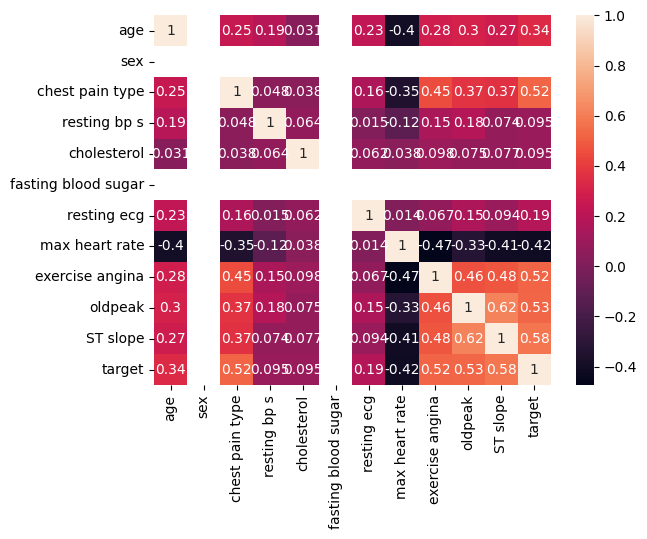

In [22]:
sns.heatmap(df.corr(), annot = True)

##

### Additional Data Preparation before Modeling

In [23]:
## Featuring Engineering

In [24]:
df["max_heart_rate_per_age"] = df["max heart rate"] / df["age"]
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,max_heart_rate_per_age
0,40,1,2,140,289,0,0,172,0,0.0,1,0,4.300000
2,37,1,2,130,283,0,1,98,0,0.0,1,0,2.648649
4,54,1,3,150,195,0,0,122,0,0.0,1,0,2.259259
5,39,1,3,120,339,0,0,170,0,0.0,1,0,4.358974
7,54,1,2,110,208,0,0,142,0,0.0,1,0,2.629630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,44,1,4,120,169,0,0,144,1,2.8,3,1,3.272727
1180,63,1,4,140,187,0,2,144,1,4.0,1,1,2.285714
1182,41,1,2,120,157,0,0,182,0,0.0,1,0,4.439024
1187,57,1,4,130,131,0,0,115,1,1.2,2,1,2.017544


In [25]:
## Train test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns =["target"])
y = df["target"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 12)
(113, 12)
(449,)
(113,)


### Modeling

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
## Hyperparameter Tuning

In [33]:
params = {
    "max_depth" : [2,3,4,5,10,15],
    "min_samples_leaf" : [10,15,20,50,100]
}

In [34]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 5,
                           scoring = "roc_auc")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15],
                         'min_samples_leaf': [10, 15, 20, 50, 100]},
             scoring='roc_auc')

In [35]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=10)

### Evaluation

In [36]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)


In [37]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf_best, pos_label = 1, average = "binary"))


0.9230769230769231
0.9384615384615385
0.8


In [38]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf_best, pos_label = 1, average = "binary"))


0.8695652173913043
0.9242424242424242
0.8666666666666667


In [39]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rf_best = rf_best.predict_proba(X_test)[:,1]

In [40]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rf_best))

0.8677884615384616
0.9669871794871796
0.9022435897435898


### Kesimpulan Bisnis

#### Dampak Bisnis

In [41]:
# Final model = Random Forest without Hyperparameter Tuning
# Recal = 97%, Precision = 91%

# Asumsikan dari setiap 100 pasien, 50 akan mengalami penyakit gagal jantung.

# Sebelum model:
# Kita tidak tahu deteksi dini, jadi kita asumsikan tingkat kelangsungan hidup adalah 50%. Maka hanya 25 yang akan selamat.

# Setelah model:
# Kita tahu siapa yang akan mengalami penyakit gagal jantung.
# Dengan recall 97%, kita akan mendeteksi dini untuk 0,97*50 = 48 orang.
# Dengan asumsi mengetahui lebih awal, tingkat kelangsungan hidup akan meningkat menjadi 75%.
# 0,75*48 = 36 orang akan selamat.